In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from pywaffle import Waffle


# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)
# see numbers after decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')
require('ggplot2')
require('dplyr')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Growth of blueberries compared to other crops

In [4]:
blue = pd.read_csv('blue_growth.csv')
blue = blue.drop(labels=[0, 1]).reset_index(drop=True)
# Dropped first two rows for 2 reasons:
#1. They were both groups of crops and not individual crops
#2. They were grouped because of insufficient data according to the source of the data
blue

,item,country_count_21,21_production,country_count_12,12_production,difference,production_change,percent_change
0,Blueberries,33,1113260.61,26,482785.93,7,630474.68,130.59
1,True hemp raw or retted,20,360196.54,17,160005.10,3,200191.44,125.12
2,Avocados,70,8810452.45,64,4418495.69,6,4391956.76,99.40
3,Hempseed,5,5566.03,8,2893.37,-3,2672.66,92.37
4,Pepper (Piper spp.) raw,43,827174.37,41,445539.97,2,381634.40,85.66
5,Maté leaves,3,1515231.05,3,821534.00,0,693697.05,84.44
6,Ginger raw,39,5556806.48,39,3016132.76,0,2540673.72,84.24
7,Lupins,25,1384963.65,26,803032.42,-1,581931.23,72.47


In [85]:
%%R -i blue -w 900 -h 500

ggplot(blue) + aes(x=reorder(item, percent_change), y=percent_change, label=round(percent_change)) +
    geom_col() + geom_text(vjust = -0.5, size = 5) + 
    labs(y="Change in production percent", x="Crops") + theme_classic()

ggsave("blue.pdf")

Saving 12.5 x 6.94 in image


## Sum of blueberry production for each year between 2012 and 2021

In [55]:
all_blue = pd.read_csv('all_blue.csv')
all_blue

,Domain Code,Domain,Country Code (M49),Country,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,year_dt
0,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2012,2012,tonnes,3677.86,I,Imputed value,2012-01-01
1,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2013,2013,tonnes,4255.14,I,Imputed value,2013-01-01
2,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2014,2014,tonnes,5019.67,I,Imputed value,2014-01-01
3,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2015,2015,tonnes,5821.55,I,Imputed value,2015-01-01
4,QCL,Crops and livestock products,36,Australia,5510,Production,1355.01,Blueberries,2016,2016,tonnes,6810.00,A,Official figure,2016-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2017,2017,tonnes,653.54,I,Imputed value,2017-01-01
280,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2018,2018,tonnes,675.37,I,Imputed value,2018-01-01
281,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2019,2019,tonnes,654.08,E,Estimated value,2019-01-01
282,QCL,Crops and livestock products,860,Uzbekistan,5510,Production,1355.01,Blueberries,2020,2020,tonnes,661.00,E,Estimated value,2020-01-01


In [66]:
all_blue['year_dt'] = pd.to_datetime(all_blue['year_dt'])
all_blue.dtypes

Domain Code                   object
Domain                        object
Country Code (M49)             int64
Country                       object
Element Code                   int64
Element                       object
Item Code (CPC)              float64
Item                          object
Year Code                      int64
Year                           int64
Unit                          object
Value                        float64
Flag                          object
Flag Description              object
year_dt               datetime64[ns]
dtype: object

In [90]:
blue_pivot = all_blue.groupby('Year').agg({'Value': ['sum'], 'Country': ['count']})
blue_pivot = blue_pivot.reset_index()
blue_pivot

,Year,Value,Country
,,sum,count
0,2012,482785.93,26
1,2013,517283.46,26
2,2014,618380.04,26
3,2015,633119.79,26
4,2016,738920.12,26
5,2017,702364.23,26
6,2018,801912.68,32
7,2019,1017250.30,30
8,2020,995270.65,33


In [102]:
blue_pivot.columns = blue_pivot.columns.droplevel(level=1)

In [104]:
blue_pivot.to_csv('for_raw.csv', index=False)

In [68]:
import matplotlib.pyplot as plt

(400000.0, 1153260.61)

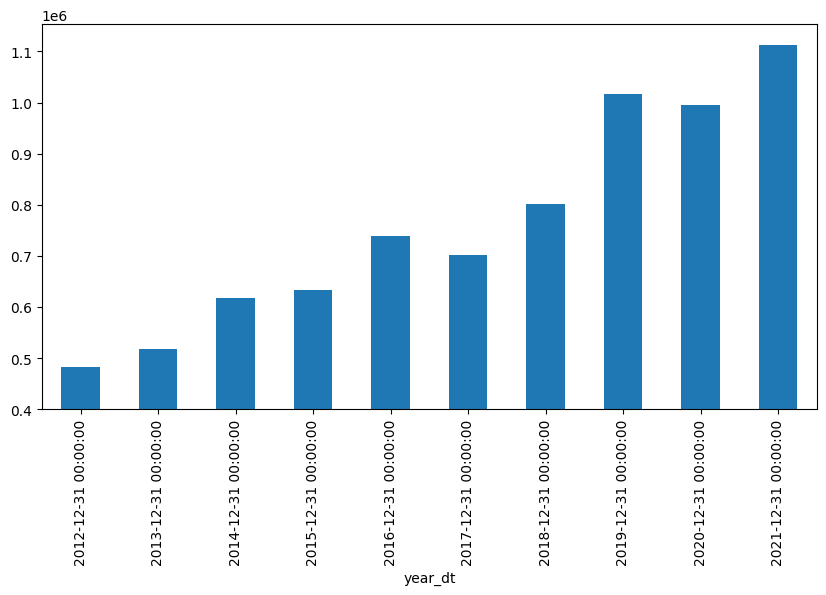

In [69]:
plt.figure(figsize=(10,5))

bar = all_blue.resample('Y', on='year_dt').Value.sum().plot(kind='bar')

bar.set_ylim([400000.00, 1153260.61])

# plt.savefig('blueberries_plot.pdf')

## Number of countries producing blueberries each year

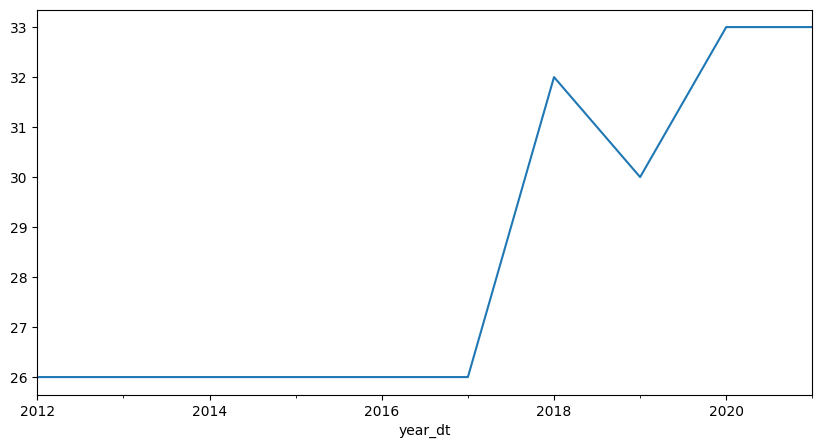

In [70]:
plt.figure(figsize=(10,5))

bar = all_blue.resample('Y', on='year_dt').Country.count().plot(kind='line')

In [73]:
all_blue.groupby(['Country', 'Year']).Value.sum().to_csv('year-country-wise-blue-production.csv')

In [5]:
duf = pd.read_csv('year-country-wise-blue-production.csv')
Peru = duf[duf.Country == "Peru"]
Peru.reset_index(drop=True)

,Country,Year,Value
0,Peru,2012,560.00
1,Peru,2013,1668.00
2,Peru,2014,2500.00
3,Peru,2015,10585.00
4,Peru,2016,22978.29
5,Peru,2017,52301.00
6,Peru,2018,94805.00
7,Peru,2019,147900.00
8,Peru,2020,179305.00
9,Peru,2021,227971.00


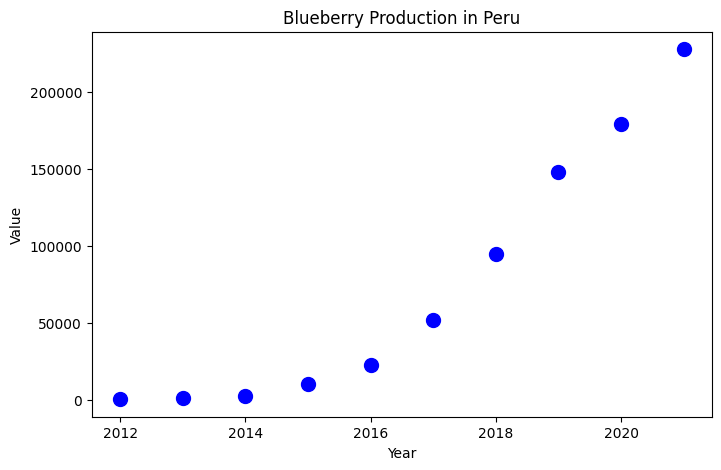

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(Peru['Year'], Peru['Value'], marker='o', linestyle='', color='blue', markersize=10)
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Blueberry Production in Peru')
plt.show()

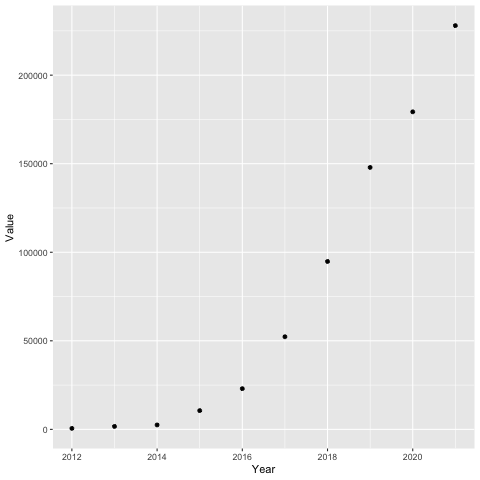

In [12]:
%%R -i Peru

ggplot(Peru) + aes(x=Year, y=Value) +
    geom_point()

In [6]:
peru_harvest = pd.read_csv('Peru_harvest.csv', usecols=['Year', "Value"])
peru_harvest

,Year,Value
0,2012,400.00
1,2013,650.00
2,2014,300.00
3,2015,1158.00
4,2016,1945.00
5,2017,4134.00
6,2018,6011.00
7,2019,8490.00
8,2020,9110.00
9,2021,16041.00
